# About pyflow

- pyflow classes wrap ecFlow classes (`pyflow.Family` wraps `ecflow.Family`)
- Provides higher level API
- Attemps to implement common idioms
- Explore ideas for script generation 

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyflow import *

Create two variables `now` and `then` that will be used later to create date `repeats`

In [3]:
import datetime

now = datetime.datetime.now()
then = now + datetime.timedelta(days=365)

# Build a suite the hard way

In [4]:
S = Suite("test")
f1 = S.add_node(Family("f1"))
t1 = f1.add_node(Task("t1"))
v = t1.add_node(Variable("FOO", 42))

S

Suite(/test)

The `add_node()` function returns the node that has just been added

In [5]:
Suite("test").add_node(Family("f1")).add_node(Task("t1")).add_node(Variable("FOO", 42))

%FOO%

`append_node()` gives you another behaviour

In [6]:
Suite("test").append_node(Family("f1")).append_node(Family("t1")).append_node(Variable("FOO", 42))

Suite(/test)

# Using the `with` statement

Ensures that the Python indentation matches the definition tree.

In [7]:
with Suite("test") as S:
    
    Limit("max", 10)
    
    with Family("f1"):
        
        with Task("t1"):
            Variable("FOO", 42)
            Label("hello", "world")
            Event("foo")
        
        with Task("t2"):
            Variable("BAR", 42)
            Meter("progress", 0, 100)
        
        with Task("t3"):
            RepeatDate("YMD", now, then)
            InLimit("max")
S

Suite(/test)

# Using shortcuts

In [8]:
S = Suite("s")
S.families += ["f1", "f2", "f3"]
S

Suite(/s)

... we will come back to shortcuts

# Navigation using dot

In [9]:
S = Suite("test")
S.add_node(Family("f1")).add_node(Task("t1")).add_node(Variable("FOO", 42))
S.add_node(Family("f2")).add_node(Task("t2")).add_node(Variable("BAR", 42))

%BAR%

In [10]:
print(S)
print(S.f1)
print(S.f1.t1)
print(S.f1.t1.FOO)

suite test
  edit ECF_JOB_CMD 'bash -c 'export ECF_PORT=%ECF_PORT%; export ECF_HOST=%ECF_HOST%; export ECF_NAME=%ECF_NAME%; export ECF_PASS=%ECF_PASS%; export ECF_TRYNO=%ECF_TRYNO%; export PATH=/usr/local/apps/ecflow/%ECF_VERSION%/bin:$PATH; ecflow_client --init="$$" && %ECF_JOB% && ecflow_client --complete || ecflow_client --abort ' 1> %ECF_JOBOUT% 2>&1 &'
  edit ECF_KILL_CMD 'pkill -15 -P %ECF_RID%'
  edit ECF_STATUS_CMD 'true'
  edit ECF_OUT '%ECF_HOME%'
  label exec_host "default"
  family f1
    task t1
      edit FOO '42'
  endfamily
  family f2
    task t2
      edit BAR '42'
  endfamily
endsuite

  family f1
    task t1
      edit FOO '42'
  endfamily

  task t1
    edit FOO '42'

$FOO


# Navigation using dot (cont.)

In [11]:
print(S.f1.t1.FOO.parent)
print(S.f1.t1.FOO.task)
print(S.f1.t1.FOO.family)
print(S.f1.t1.FOO.suite)
print(S.children)

  task t1
    edit FOO '42'

  task t1
    edit FOO '42'

  family f1
    task t1
      edit FOO '42'
  endfamily

suite test
  edit ECF_JOB_CMD 'bash -c 'export ECF_PORT=%ECF_PORT%; export ECF_HOST=%ECF_HOST%; export ECF_NAME=%ECF_NAME%; export ECF_PASS=%ECF_PASS%; export ECF_TRYNO=%ECF_TRYNO%; export PATH=/usr/local/apps/ecflow/%ECF_VERSION%/bin:$PATH; ecflow_client --init="$$" && %ECF_JOB% && ecflow_client --complete || ecflow_client --abort ' 1> %ECF_JOBOUT% 2>&1 &'
  edit ECF_KILL_CMD 'pkill -15 -P %ECF_RID%'
  edit ECF_STATUS_CMD 'true'
  edit ECF_OUT '%ECF_HOME%'
  label exec_host "default"
  family f1
    task t1
      edit FOO '42'
  endfamily
  family f2
    task t2
      edit BAR '42'
  endfamily
endsuite

odict_values([Label(/test:exec_host), %ECF_JOB_CMD%, %ECF_KILL_CMD%, %ECF_STATUS_CMD%, %ECF_OUT%, Family(/test/f1), Family(/test/f2)])


In [12]:
print(S.f1.tasks)
print(S.families)

Tasks<  family f1
    task t1
      edit FOO '42'
  endfamily
>
Families<suite test
  edit ECF_JOB_CMD 'bash -c 'export ECF_PORT=%ECF_PORT%; export ECF_HOST=%ECF_HOST%; export ECF_NAME=%ECF_NAME%; export ECF_PASS=%ECF_PASS%; export ECF_TRYNO=%ECF_TRYNO%; export PATH=/usr/local/apps/ecflow/%ECF_VERSION%/bin:$PATH; ecflow_client --init="$$" && %ECF_JOB% && ecflow_client --complete || ecflow_client --abort ' 1> %ECF_JOBOUT% 2>&1 &'
  edit ECF_KILL_CMD 'pkill -15 -P %ECF_RID%'
  edit ECF_STATUS_CMD 'true'
  edit ECF_OUT '%ECF_HOME%'
  label exec_host "default"
  family f1
    task t1
      edit FOO '42'
  endfamily
  family f2
    task t2
      edit BAR '42'
  endfamily
endsuite
>


# Using the array notation 

In [13]:
print(S["f1"]["t1"])
print(S.f1["t1"])
print(S["f1"].t1)

  task t1
    edit FOO '42'

  task t1
    edit FOO '42'

  task t1
    edit FOO '42'



Needed for digit only node names

In [14]:
with Suite("s") as S:
    with Family("12"):
        Task("t")
        
S["12"]

Family(/s/12)

# Using the array notation with classes

In [15]:
print(S[Family])

Families<suite s
  edit ECF_JOB_CMD 'bash -c 'export ECF_PORT=%ECF_PORT%; export ECF_HOST=%ECF_HOST%; export ECF_NAME=%ECF_NAME%; export ECF_PASS=%ECF_PASS%; export ECF_TRYNO=%ECF_TRYNO%; export PATH=/usr/local/apps/ecflow/%ECF_VERSION%/bin:$PATH; ecflow_client --init="$$" && %ECF_JOB% && ecflow_client --complete || ecflow_client --abort ' 1> %ECF_JOBOUT% 2>&1 &'
  edit ECF_KILL_CMD 'pkill -15 -P %ECF_RID%'
  edit ECF_STATUS_CMD 'true'
  edit ECF_OUT '%ECF_HOME%'
  label exec_host "default"
  family 12
    task t
  endfamily
endsuite
>


In [16]:
S[:]

odict_values([Label(/s:exec_host), %ECF_JOB_CMD%, %ECF_KILL_CMD%, %ECF_STATUS_CMD%, %ECF_OUT%, Family(/s/12)])

In [17]:
S[Family] += ["f4", "f5"]

In [18]:
for n in S[Family]:
    print(n)

  family 12
    task t
  endfamily

  family f4
  endfamily

  family f5
  endfamily



# Using the array notation with classes (cont.)

In [19]:
S[:]

odict_values([Label(/s:exec_host), %ECF_JOB_CMD%, %ECF_KILL_CMD%, %ECF_STATUS_CMD%, %ECF_OUT%, Family(/s/12), Family(/s/f4), Family(/s/f5)])

In [20]:
S["FOO"] = 42

In [21]:
S[:]

odict_values([Label(/s:exec_host), %ECF_JOB_CMD%, %ECF_KILL_CMD%, %ECF_STATUS_CMD%, %ECF_OUT%, Family(/s/12), Family(/s/f4), Family(/s/f5), %FOO%])

# Using shortcuts (part 2)

In [22]:
S = Suite("s")

S.families += ["f1", "f2"]
S.f1.tasks += ["t1", "t2"]
S.f2.tasks += ["t1", "t2"]

S

Suite(/s)

# Triggers are defined using the dot notation

In [23]:
S.f1.t1.complete

(/s/f1/t1 eq complete)

Using the Trigger class

In [24]:
S.f2.t2.add_node(Trigger(S.f1.t1.complete))

Trigger((/s/f1/t1 eq complete))

Using the dot notation shortcut:

In [25]:
S.f1.t1.triggers = S.f2.t2.complete

S

Suite(/s)

# Trigger expressions

In [26]:
S = Suite("s")

S.tasks += ["t1", "t2", "t3"]
S.t3.triggers = S.t1.complete & (S.t2.aborted | S.t2.active)

S

Suite(/s)

# Trigger composition

In [27]:
S = Suite("s")

S.tasks += ["t1", "t2", "t3"]
S.t3.triggers = t1.complete 
S.t3.triggers &= S.t2.aborted 
S.t3.triggers |= S.t2.active

S

Suite(/s)

# Defining pipelines

In [28]:
S = Suite("s")
S.tasks += ["t1", "t2", "t3"]

S.t1 >> S.t2 >> S.t3

S

Suite(/s)

# Variables and repeats
Attributes following the ecFlow variable name convention (only capital letters, `_` and digits, can not start with a digit) are turned into variables

In [29]:
S = Suite("s")
S.tasks += "t1"

In [30]:
S.t1.BAR = 61

Reassigning to the same variable overwrites its value:

In [31]:
S.t1.BAR = 62
S

Suite(/s)

Assigning a tuple to a variable creates a `repeat`

In [32]:
S = Suite("s")
S.tasks += "t1"

S.t1.BAR = (1, 10)
S

Suite(/s)

A 3-tuple yields a repeat with a step

In [33]:
S = Suite("s")
S.tasks += "t1"

S.t1.BAR = (1, 10, 2)
S

Suite(/s)

This also works with dates

In [34]:
S = Suite("s")
S.tasks += ["t1", "t2"]

S.t1.BAR = (now, then)
S.t2.FOO = ['1990-01-01', '1995-12-31', 7]

S

Suite(/s)

In [35]:
S = Suite("s")
S.tasks += "t1"

S.t1.BAR = (now, then, 2)

S

Suite(/s)

List of strings create a `repeat string`

In [36]:
S = Suite("s")
S.tasks += "t1"

S.t1.BAR = ['a', 'b', 'c']

S

Suite(/s)

Lists of integers create a `repeat enum`

In [37]:
S = Suite("s")
S.tasks += "t1"

S.t1.BAR = [1, 2, 3, 4, 5]

S

Suite(/s)

# Repeat and triggers

In [38]:
S = Suite("s")
S.tasks = ["t1", "t2", "t3", "t4"]

(t1, t2, t3, t4) = (S.t1, S.t2, S.t3, S.t4)

t2.YMD = (now, then)
t4.YMD = (now, then)

t2.triggers = (t2.YMD >= t4.YMD) & (~t4.complete)
t1.triggers = t4.YMD.monday | (t2.complete & t3.aborted)

S

Suite(/s)

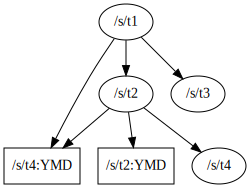

In [39]:
S.draw_graph()

# External nodes

In [40]:
S = Suite("s")
t = S.add_node(Task("t"))

e = ExternNode("/a/b/c")

t.triggers = e.complete

S

Suite(/s)

# External nodes (cont.)

In [41]:
with Suite("s") as S:
    
    Task("t", YMD=(now, then))

e = ExternYMD("/a/b/c:YMD")

S.t.triggers = (e > S.t.YMD)

S

Suite(/s)

# Constructor initialisation

In [42]:
with Suite("s", YMD=(now, then), FOO=42) as S:
    
    with Family("f", BAR=(1, 10)):
        Task("t")
        
S

Suite(/s)

...to be continued

# Cron

In [43]:
S = Suite("a")
S.tasks = ["f1", "f2", "f3"]

S.f1.cron = "* * * * *"
S.f2.cron = "10 5 * * *"
S.f3.cron = "10,40 5-17 * * *"

S

Suite(/a)

# Time

In [44]:
S = Suite("a")
S.tasks = ["f1", "f2", "f3"]

S.f1.time = "* * * * *"
S.f2.time = "10 5 * * *"
S.f3.time = "10,40 5-17 * * *"

S

Suite(/a)

# Today

In [45]:
S = Suite("a")
S.tasks = ["f1", "f2", "f3"]

S.f1.today = "* * * * *"
S.f2.today = "10 5 * * *"
S.f3.today = "10,40 5-17 * * *"

S

Suite(/a)

# Autocancel

In [46]:
S = Suite("a")
S.tasks = ["f1", "f2", "f3", "f4", "f5", "f6"]

S.f1.autocancel = "3"
S.f2.autocancel = "10:10"
S.f3.autocancel = "+10:10"
S.f4.autocancel = 4
S.f5.autocancel = (10, 10)
S.f6.autocancel = True

S

Suite(/a)

# Defstatus

In [47]:
with Suite("s") as s:
    s.defstatus = state.complete
    s.tasks = ["t"]
    
s

Suite(/s)

# Day

In [48]:
S = Suite("a")

S.tasks = ["t1", "t2"]
S.t1.day = "monday"
S.t2.day = ["monday", "friday"]

S

Suite(/a)

# Date

In [49]:
S = Suite("a")
S.tasks = ["t1", "t2", "t3"]

S.t1.date = (10, None, None)
S.t2.date = "1.*.*"
S.t3.date = now

S

Suite(/a)

# Suite repeat

In [50]:
S = Suite("a")
S.repeat = True
S

Suite(/a)

# Zombies (needs work)

In [51]:
S = Suite("a")
S.zombies = False
S

Suite(/a)

# Constructor initialisation (part 2)


List version

In [52]:
with Suite("s", repeat=True, limits=[("foo", 2), ("bar", 5)]) as S:
    
    with Family("f", meters=("progress", 1, 10)):
        Task("t", labels=[("info", "hello"), ("status", "-")])
        
S

Suite(/s)

# Constructor initialisation (part 3)


Dictionary version

In [53]:
with Suite("s", repeat=True, limits={"foo": 2, "bar": 5}) as S:
    
    with Family("f", meters={"progress": (1, 10)}):
        Task("t", labels={"info": "hello", "status": "-"})
        
S

Suite(/s)

# Using shortcuts (part 3)

In [54]:
S = Suite("test")
S.families += ["f1", "f2"]

tasks = {"t1": {"FOO": 42}, 
         "t2": {"labels":[("info","-"), ("hello","world")]}, 
         "t3": {"meters":("progress",1, 100)},
         "t4": {"YMD": (now, then)}
        }

S.f1.tasks += tasks
S.f2.tasks += tasks

S

Suite(/test)

# Using shortcuts (part 4)

In [55]:
with Suite("s") as s:
    t = [("s%004d" % n, {'STEP': n}) for n in range(0, 48 + 6, 6)]
    s.tasks += t
    
s

Suite(/s)

# Using JSON (needs more work)

In [56]:
Suite("s", json={
    "FOO": 42,
    "f1": {
        "YMD": ["2010-01-01", "2011-01-01"],
        "labels": {"foo": "bar"},
        "t1": {"autocancel": True},
        "t2": {"cron": "10 * * * *"},
        "t3": {
            "day": ["monday", "sunday"],
            "defstatus": "complete",
            "triggers": {"or": [{"complete": "t1"}, {"complete": "t2"}]}
        },
        "t4": {"time": "* * * * *"},
        "t5": {"today": "* * * * *"},
        "t6": {"meters": {"foo": [1, 100], "bar": [1, 100]}},
        "t7": {"limits": {"foo": 1, "bar": 2 }},
        "t8": {"inlimits": ["foo", "bar"]
        },
        "t9": {}
    },
    "f2": {
        "FOO": 42
    },
    "repeat": True
})

Suite(/s)

# Just an idea: plural versions: 'Family' becomes 'Families'

In [57]:
with Suite("s") as s:
    with Families("oper", "test"):
        InLimits("foo", "bar")
        with Tasks("ta", "tb", "tc"):
            Events("a", "b", "c")
s

Suite(/s)

# Assigning different values to each element of a "plural"

In [58]:
def parent_name(n):
    return n.parent.name

with Suite("s") as s:
    with Families("oper", "test", FOO=parent_name):
        InLimits("foo", "bar")
        with Tasks("ta", "tb", "tc", inlimits=parent_name):
            Events("a", "b", "c")
s

Suite(/s)

# Idea for higher level idioms: following dates

In [59]:
from pyflow import Suite, Task
import datetime

now = datetime.datetime.now()

with Suite("s") as s:

    t1 = Task("t1", YMD=(now, now)) 
    t2 = Task("t2")
    t3 = Task("t3")

    t2.follow = t1.YMD 

s

Suite(/s)

# Finally, exploring script generation
Rationale: keep definitions and code together

In [60]:
with Suite("s") as S:
    Task("t1")

S.deploy_suite(target=Notebook)

# Adding a script to a task

In [61]:
with Suite("s") as S:

    t1 = Task("t1") 
    t1.script = """mars<<@
retrieve,target=data
@"""

S.deploy_suite(target=Notebook, headers=False)

# Scripts as classes

In [62]:
class Request(Script):

    def __init__(self, **request):
        super().__init__("""mars<<@
{}
@""".format(','.join([self._verb] + ['%s=%s' % it for it in request.items()])))

class Retrieve(Request):
    _verb = 'retrieve'

with Suite("s") as S:

    t1 = Task("t1") 
    t1.script = Retrieve(target="data",date=-1)

S.deploy_suite(target=Notebook, headers=False)

# Extra headers

In [63]:
class MySuite(Suite):
    
    head = """WORKDIR=%WORKDIR%/%FAMILY:%
mkdir -p $WORKDIR
cd $WORKDIR"""
    
    tail = 'rm -fr $WORKDIR'
    
    
with MySuite("s", ECF_FILES="/") as S:
    t1 = Task("t1") 
    t1.script = 'echo "I am in directory $(pwd)"'

In [64]:
S.deploy_suite(target=Notebook)

# What next?

In [65]:
import pyflow

class EcSuite(pyflow.Suite):

    def __init__(self, name, user="emos", account="oesu", host="lxop", limits={}, **kwargs):        
        
        cmd = "%TRIMURTI% %USER% %HOST% %ECF_JOB% %ECF_JOBOUT%"
        out = "/vol/emos_nc/output"
        home = "/home/ma/emos/def/"

        variables = {"ACCOUNT": account,
                     "USER": user,
                     "HOST": host,
                     "DELTA_DAY": 0,
                     "ECF_EXTN": ".ecf",
                     "ECF_FILES": home + name + "/smsfiles",
                     "ECF_HOME": out,
                     "ECF_INCLUDE": home + name + "/include",
                     "ECF_JOB_CMD": cmd,
                     "ECF_KILL_CMD": cmd + " kill",
                     "ECF_OUT": out,
                     "ECF_STATUS_CMD": cmd + " stat",
                     "ECF_TRIES": 1,
                     }

        variables.update(kwargs)

        super().__init__(name, **variables)

        if limits:
            with self:
                with pyflow.Family("limits"):
                    for k, v in sorted(limits.items()):
                        pyflow.Limit(k, v)

    @property
    def limits(self):
        return self["limits"]

In [66]:
class EMOSSuite(EcSuite):
    
        def __init__(self, name, schosts=("ccb", "cca"), **kwargs):
            
            out = "%STHOST%/tcwork/emos/logs/" + name
            
            variables = {"LOGDIR": out,
                         "ECF_OUT": out,
                         "ECF_LOGPORT": 9316,
                         "SCHOST": schosts[0],
                         "SCHOST_BKUP": schosts[1],}

            variables.update(kwargs)
            
            super().__init__(name, 
                                            user="emos", 
                                            account="oesu", 
                                            **variables)

In [67]:
class OSuite(EMOSSuite):
    
    def __init__(self, name, **kwargs):
        super().__init__(name, **kwargs)
        
        self.EXPVER = "0001"
    

with OSuite("o", defstatus=state.suspended):
    
    with Families("00", "12"):
        pass

# More idioms

In [68]:
def STEPS(start, hourly_until, three_hourly_until, six_hourly_until):
    yield start
    while start < hourly_until:
        start += 1
        yield start
    while start < three_hourly_until:
        start += 3
        yield start
    while start < six_hourly_until:
        start += 6
        yield start

In [69]:
print(list(STEPS(0, 120, 144, 240)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 126, 129, 132, 135, 138, 141, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240]


# Incremental suite building

In [70]:
S = Suite("s")

In [71]:
S.A = 3

In [72]:
S.A

%A%

In [73]:
S

Suite(/s)

In [74]:
S.tasks += ["a", "b", "c"]

In [75]:
S

Suite(/s)

# Adding nodes programmatically

In [76]:
def create_nodes(s, n):
    for i in range(n):
        Task('{}_{}'.format(s, i))

In [77]:
with Suite('s') as s:
    with Family('f'):
        create_nodes('foo', 5)
        create_nodes('bar', 3)
s

Suite(/s)

In [78]:
def create_more_nodes(s, n):
    return [Task('{}_{}'.format(s, i)) for i in range(n)]

In [79]:
with Suite('s') as s:
    f = Family('f')
    f.add_node(create_more_nodes('foo', 5))
    f.add_node(create_more_nodes('bar', 3))
s

Suite(/s)

# Using inheritance

In [80]:
class MyFamily(Family):
    def __init__(self, name='MyFamily', extra=[]):
        super().__init__(name)
        with self:
            Task('foo')
            for e in extra:
                Task(e)
            Task('bar')

In [81]:
class MyOtherFamily(MyFamily):
    def __init__(self, name='MyOtherFamily'):
        super().__init__(name)
        with self:
            Task('quux')

In [82]:
with Suite('s') as s:
    MyFamily(extra=['baz', 'a', 'b'])
    MyOtherFamily()
s

Suite(/s)

# Miscellaneous

Adding children to a node

In [83]:
s = Suite('s')
s += [Family('f'), Task('t'), Variable('FOO', 'bar')]
s

Suite(/s)

Defining variables with `Edit`

In [84]:
with Suite('s') as s:
    with Family('f', MYVAR=0):
        Edit(X=0)

s

Suite(/s)